Urban Data Science & Smart Cities <br>
URSP688Y Spring 2025<br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

# Demo 6 - Data Visualization

- Principles of graphic communication
- Matplotlib
- Seaborn
- Export to Illustrator

## Principles of graphic communication

### More is less
Remove ink until the last thing you removed changes the meaning; add that back and quit.

#### "Chartjunk"

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk1.png" alt="chartjunk"/>

([Source: qimacros.com](https://www.qimacros.com/free-excel-tips/graphical-excellence/))

- Legend is redundant with title
- X-axis labels are redundant ("Project")
- Gridlines are unnecessary
- Frame around the plot (neat line) doesn't have meaning
- Bar style (with outline) is unnecessarily complicated

#### An editing sequence

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk2.png" alt="excel graph"/>

Better to order values?

<img src="https://www.qimacros.com/free-excel-tips/graphical-excellence/bar-chartjunk3.png" alt="even better graph"/>

Can we make it even better?

<img src="https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo05/error_rate_graph.png?raw=true" alt="can we make it even better?" width="600"/>

### Visual hierarchy (figure-ground)

The most important information should stand out. 

Visual variables at your disposal for communicating hierarchy:
- Size
- Order
- Spacing
- Color saturation/value/contrast
- Texture

<img src="https://www.graphicdesignforum.com/uploads/default/original/2X/d/d9cf78fffdcf72b0179dcb26efc14cdbd39854ff.jpeg" alt="graphic design has rules" width="300"/>

([Source: graphicdesignforum.com](https://www.graphicdesignforum.com/t/you-will-read-this-first/13726))

#### Good figure-ground

"Color and brightness contrast let the land come forward from the ocean, and things like the river come forward from the land." ([Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa4480f73455816dc71ace1_figure_ground_good.jpeg" alt="bad figure-ground"/>

#### Less good figure-ground

"Low contrasts make it harder and slower to pick out any salient elements." ([Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa4480f6854b572eb93b9a1_figure_ground_bad.jpeg" alt="less good figure-ground"/>

([Source: Axis Maps](https://www.axismaps.com/guide/visual-hierarchy))

### Alignment and consistency

Messiness looks like sloppiness looks like ineptitude.

<img src="https://visme.co/blog/wp-content/uploads/2015/12/alignment.jpg" alt="bad alignment" width="500"/>

<img src="https://visme.co/blog/wp-content/uploads/2015/12/fixed3.jpg" alt="2-3 fonts, different weights of same typeface" width="500"/>

([Source: visme.co](https://visme.co/blog/graphic-design-rules/))

[Examples of bad maps.](https://storymaps.arcgis.com/stories/6b168cb3aeb44c84b3ce04ca7fe5222e)

### Gestalt principles

<img src="https://assets-global.website-files.com/5b69a01ba2e409501de055d1/642188a15110ca0a392afaab_Gestalt%20Principles.png" alt="gestalt principles"/>

([Source: Structural Learning](https://www.structural-learning.com/post/gestalt-psychology))

### Visual variables

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa44835ab735150a7e18135_visual_variables.png" alt="bertin's visual variables" width="800"/>

([Source: Axis Maps](https://www.axismaps.com/guide/visual-variables))

### Use an appropriate chart type

#### Bar: Discrete quantities
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/bar-chart.png" alt="bar plot example"/>

#### Line: Quantities that vary continuously, even if only sampled sporadically
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/line-chart.png" alt="line plot example"/>

#### Scatter: Discrete (or continuous) quantities in two dimensions
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/scatter-plot.png" alt="scatter plot example"/>

#### Box plot: Distribution of a sample
<img src="https://chartio.com/images/tutorials/charts/essential-chart-types/box-plot.png" alt="box plot example"/>

#### Notice I haven't shown you a pie chart?
- ***Use sparingly***
- Useful in certain circumstances: to emphasize balance or imbalance in quantities
- Very difficult to make comparisons between slices or pies
- Usually terrible with more than five slices
- <ins>Always</ins> put labels directly on/in/next to slices
- Consider a stacked bar chart instead

([Source: Chartio](https://chartio.com/learn/charts/essential-chart-types-for-data-visualization/))

## [Matplotlib](https://matplotlib.org/)

Now let's think about how to make charts in Python.

Matplotlib is the package behind the scenes for nearly all plotting in Python.

It's very flexible/capable/customizable, but also very clunky and non-intuitive.

It often feels like it requires an inordinate amount of code to produce a chart.

Nonetheless, you will run into it as a way to customize plots from other packages.

To install Matplotlib, let's install a different graph-making package, [Seaborn](https://seaborn.pydata.org/index.html), that uses Matplotlib as a dependency, so it will automatically be installed along the way. We'll try using Seaborn a bit later.

In [1]:
# Install Seaborn

# ! conda install -y seaborn

In [2]:
import matplotlib.pyplot as plt

### Building from Basics

Before we get into automated plotting tools, I want to show how plotting is, at a basic level, just drawing things with coordinates. If you need to make something highly customized, you can program it with Matplotlib.

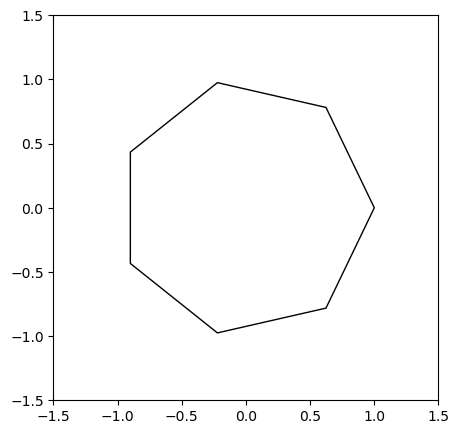

In [3]:
import numpy as np

def construct_polygon(num_vertices):
    """
    Adapted from ChatGPT4.0 query: "write a python function to draw a pentagon in matplotlib"
    """
    # Angle between vertices
    angle = 2 * np.pi / num_vertices
    # Generate the vertices
    vertices = [(np.cos(i * angle), np.sin(i * angle)) for i in range(num_vertices)]
    # Adding the first vertex at the end to close the pentagon
    vertices.append(vertices[0])
    # Return the coordinates as x and y lists
    return zip(*vertices)

def plot_polygon(num_vertices):
    """
    Adapted from ChatGPT4.0 query: "write a python function to draw a pentagon in matplotlib"
    """
    x, y = construct_polygon(num_vertices)
    plt.figure(figsize=(5,5))
    plt.fill(x, y, 'w', edgecolor='k')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')  # Equal aspect ratio to ensure the pentagon looks correct
    plt.show()

plot_polygon(7)

### Plotting data from a DataFrame

Let's try plotting data from a Pandas Dataframe.

We'll use data from the Washington, D.C. Open Data Portal on [affordable housing units](https://opendata.dc.gov/datasets/DCGIS::affordable-housing/about).

In [4]:
# Import dependencies
import pandas as pd

In [5]:
# Load data table
df = pd.read_csv('Affordable_Housing.csv')

In [6]:
df.head(1)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-8.569449e+06,4.708038e+06,119968,Ward 5,"1122 Bladensburg Road Northeast, Washington, D...",1122-1124 Bladensburg Rd NE,Completed 2015 to Date,DHCD,4,38.904778,...,1,3,0,0,NaN,73518.0,401676.8,137432.93,1122 BLADENSBURG ROAD NE,2024/09/23 09:00:26+00


In [7]:
df['MAR_WARD'] = df['MAR_WARD'].replace('1', 'Ward 1')

In [8]:
# Let's make a bar chart showing the number of projects in each ward
ward_counts = df['MAR_WARD'].value_counts()

In [9]:
names = ward_counts.index
counts = ward_counts.values

In [10]:
names

Index(['Ward 5', 'Ward 4', 'Ward 6', 'Ward 8', 'Ward 1', 'Ward 7', 'Ward 2',
       'Ward 3'],
      dtype='object', name='MAR_WARD')

In [11]:
len(names)

8

In [12]:
len(counts)

8

In [13]:
# Can we make the names simpler?

# This is a "list comprehension." It's a mini for loop.
names = [name.split()[1] for name in names]
names

['5', '4', '6', '8', '1', '7', '2', '3']

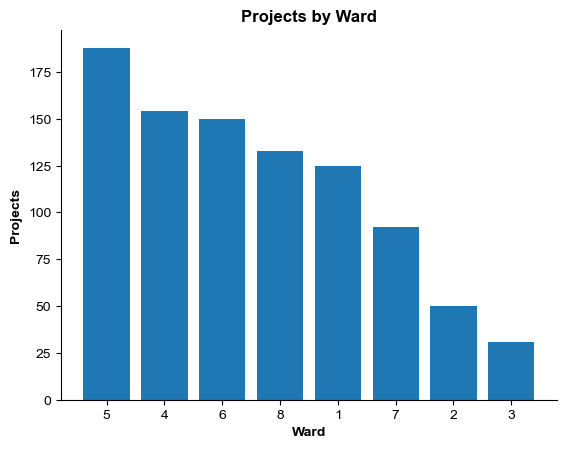

In [14]:
# Define the figure object (like a piece of paper)
fig = plt.figure()
# Define an axis within the figure (coordinate space) 
ax = fig.add_subplot(111) # an axis on a 1x1 grid in first position
# Draw a bar chart within the axis
ax.bar(names, counts)

# Customize the plot
# Remove frames on right and top
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Define fonts
font = {'fontname': 'Arial'}
title_font = {**font, **{'fontweight':'bold'}} # {**dict1, **dict2} combines two dictionaries
# Set font for ticks
plt.yticks(**font) # **dict in a function call expands the dictionary keys into keyword arguments
plt.xticks(**font)
# Set title and axis labels
plt.title('Projects by Ward', title_font)
plt.xlabel('Ward', title_font) 
plt.ylabel('Projects', title_font)

# Show the completed plot
plt.show()

## Pandas `plot` method

In [15]:
ward_counts

MAR_WARD
Ward 5    188
Ward 4    154
Ward 6    150
Ward 8    133
Ward 1    125
Ward 7     92
Ward 2     50
Ward 3     31
Name: count, dtype: int64

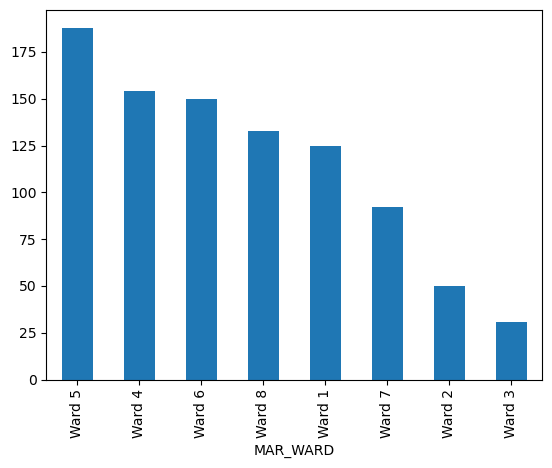

In [16]:
# Plotting a series
ax = ward_counts.plot.bar()

# You can still customize with Matplotlib
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

plt.show() # This just avoids a text output

## [Seaborn](https://seaborn.pydata.org/)

Seaborn is the most common Python package for (marginally) better plotting in ways that are similar to the popular ggplot package in R. 

It has some great default styles and some additional methods for customization.

[Examples](https://seaborn.pydata.org/examples/index.html)

In [17]:
import seaborn as sns
sns.set_style('ticks') # Set a default style for this Python session

Let's use Seaborn's [`countplot` function](https://seaborn.pydata.org/generated/seaborn.countplot.html) to plot the number of projects in each ward.

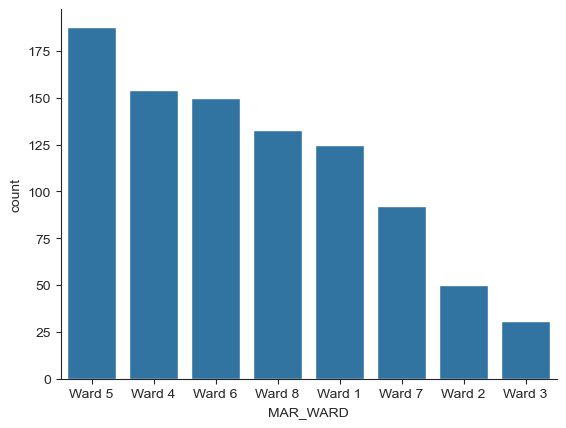

In [18]:
sns.countplot(df, x='MAR_WARD', order=df['MAR_WARD'].value_counts().index)
sns.despine()

Let's use the `set` method on the axis to clean up the labels.

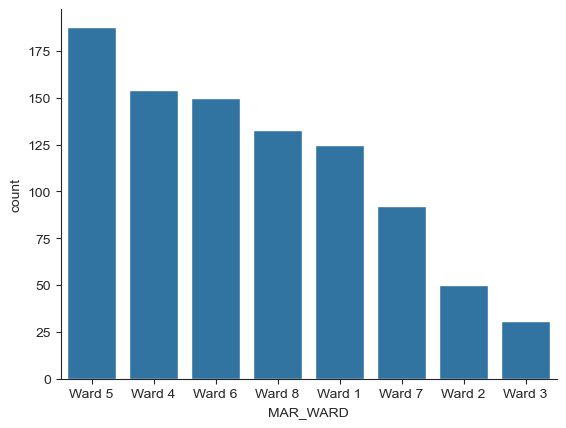

In [38]:
sns.countplot(df, x='MAR_WARD', order=df['MAR_WARD'].value_counts().index)
sns.despine()

Now let's flex Seaborn's muscles with a more complex plot that groups and aggregates by category, and also gives us some statistical inference with error bars.

We'll use the [`barplot` function](https://seaborn.pydata.org/generated/seaborn.barplot.html) to compare the average number of affordable units with each status in each ward.

Is this plot too busy? How could we simplify it visually?

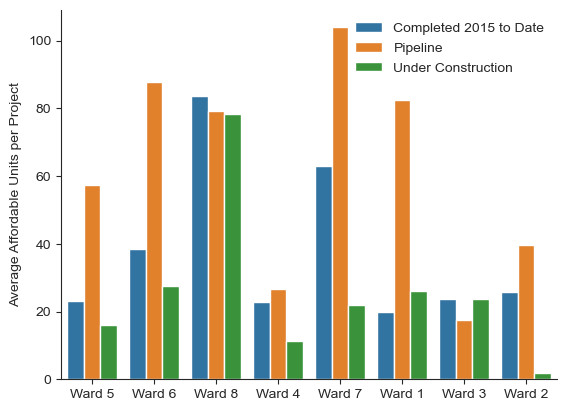

In [32]:
fig = plt.figure() # Not entirely necessary, but helpful for ensuring you're starting with a blank canvas
ax = sns.barplot(df, x='MAR_WARD', y='TOTAL_AFFORDABLE_UNITS', hue="STATUS_PUBLIC", estimator='mean', errorbar=None)
ax.set(
    xlabel=None, 
    ylabel='Average Affordable Units per Project'
)
plt.legend(title=None, frameon=False)
sns.despine()

And, of course, we can tidy up our code by writing a custom plot function.

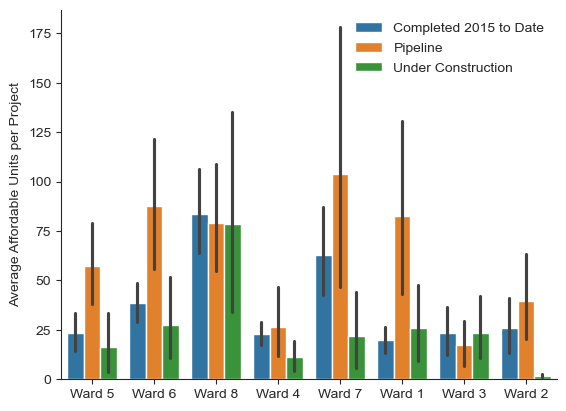

In [33]:
def plot_average_affordable_units_by_status(df):
    fig = plt.figure()
    ax = sns.barplot(df, x='MAR_WARD', y='TOTAL_AFFORDABLE_UNITS', hue="STATUS_PUBLIC")
    ax.set(
        xlabel=None, 
        ylabel='Average Affordable Units per Project'
    )
    plt.legend(title=None, frameon=False)
    sns.despine()
    return fig

fig = plot_average_affordable_units_by_status(df)

## Exporting to Illustrator

Sometimes, it's just plain easier to clean up and further customize a messy plot in Illustrator. For this, export to EPS, a vector graphic format.

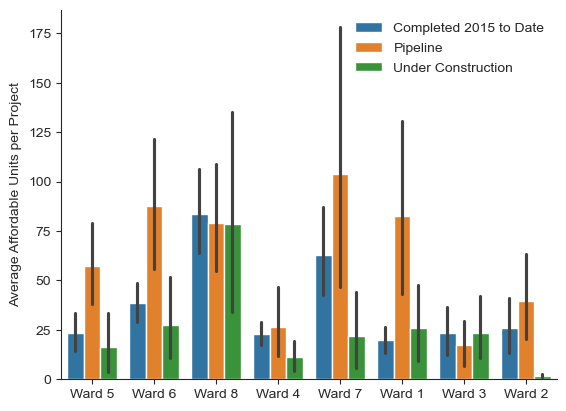

In [34]:
# Let's check what's stored in the `fig` variable
fig

In [36]:
fig.savefig('affordable_housing_units_per_ward.png', format='png')

In [37]:
fig.savefig('affordable_housing_units_per_ward.eps', format='eps')